In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from statistics import mean
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMRegressor
import math
sns.set()

In [12]:
data = pd.read_csv("ML_DATA_CLEANED.csv")

3.1327446098924328

In [ ]:
data['Gender'].isnull().values.any()

In [13]:
data.loc[data['Gender']==3,['Gender']] = np.nan

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(new_data, x_vars=['Age','Gender'], y_vars='hcc_based_risk', size=7, aspect=0.7)

In [ ]:
sns.pairplot(new_data, x_vars=['Age','Gender'], y_vars='acg_based_risk', size=7, aspect=0.7)

In [ ]:
data['hcc_based_risk']

In [14]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(data) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe
new_data=pd.DataFrame(data=new_array, columns=data.columns)
new_data.loc[new_data['Gender']> 0.5,['Gender']] = 1
new_data.loc[new_data['Gender']< 0.5,['Gender']] = 0

In [5]:
columns = ['Age','Gender','acg_based_risk','hcc_based_risk']

plot.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    #new_data[column]+=1
    ax = plot.subplot(3,2,plotnumber)
    sns.distplot((new_data[column]))
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

NameError: name 'plot' is not defined

In [15]:
new_data['Gender'].unique()

array([1., 0.])

In [16]:


X = new_data.iloc[:, 1:113].values
y = new_data.iloc[:, -1].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
yhat = regressor.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print (r_squared, adjusted_r_squared)

0.7100650893851357 0.7022309012092938


In [23]:
rms = mean_squared_error(y_test, yhat, squared=False)
print(rms)

print(math.sqrt(rms))

0.6034873495845703
0.7768444822386076


In [ ]:
import shap

In [ ]:
X,y = shap.datasets.boston()

In [ ]:
explainer = shap.Explainer(regressor.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 18
shap.partial_dependence_plot(
    "RM", model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

In [ ]:
X100 = shap.utils.sample(X, 100)

In [ ]:
new_data.columns[1:113]

In [ ]:
model = LGBMRegressor()
# fit the model on the whole dataset
model.fit(X_train, y_train)

In [ ]:
yhat = model.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print (r_squared, adjusted_r_squared)



In [ ]:
rms = mean_squared_error(y_test, yhat, squared=False)
print(rms)

In [ ]:
feature_data = pd.DataFrame(sorted(zip(model.feature_importances_,new_data.columns[1:113])), columns=['Value','Feature'])

In [ ]:
new = feature_data.iloc[95:112,]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = new
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
xgb1 = xgboost.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

In [ ]:
# train XGBoost model
import xgboost
params = {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
model_xgb = xgboost.XGBRegressor(**params).fit(X_train, y_train)


In [ ]:
yhat = model_xgb.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print (r_squared, adjusted_r_squared)

In [ ]:
rms = mean_squared_error(y_test, yhat, squared=False)
print(rms)

In [ ]:
feature_data = pd.DataFrame(sorted(zip(model_xgb.feature_importances_,new_data.columns[1:113])), columns=['Value','Feature'])

In [ ]:
new = feature_data.iloc[95:112,]

In [ ]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = new
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X = new_data.iloc[:, 1:113].values

In [ ]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
data

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
  GBR = GradientBoostingRegressor()

In [ ]:
 parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [ ]:
 grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
 grid_GBR.fit(X_train, y_train)

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
reg = GradientBoostingRegressor(learning_rate=0.01,max_depth=4,n_estimators=1500,subsample = 0.2)

In [ ]:
reg.fit(X_train,y_train)

In [ ]:
yhat = reg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)       
SS_Total = sum((y_test-np.mean(y_test))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print (r_squared, adjusted_r_squared)

In [ ]:
rms = mean_squared_error(y_test, yhat, squared=False)
print(rms)

In [ ]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

In [ ]:
sns.countplot(data['acg_based_risk'])

In [ ]:
x = new_data.drop(['acg_based_risk','hcc_based_risk','patient_id'],axis=1)
y = new_data['acg_based_risk']
rdsmple = RandomOverSampler()
x_sampled,y_sampled  = rdsmple.fit_resample(x,y)

In [ ]:
X = x_sampled
y = y_sampled

In [ ]:
sns.countplot(y)

In [ ]:
##### Splitting Data ###################
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
##### Classification ########

import lightgbm as lgb
clf = lgb.LGBMClassifier(num_leaves=100,num_iterations=150)
clf.fit(X_train, y_train)

In [ ]:
params = {'boosting_type': 'gbdt', 'max_depth': -1, 'objective': 'binary', 
              'num_leaves': 64, 'learning_rate': 0.05, 'max_bin': 512, 
              'subsample_for_bin': 200, 'subsample': 1, 'subsample_freq': 1,
              'colsample_bytree': 0.8, 'reg_alpha': 5, 'reg_lambda': 10, 
              'min_split_gain': 0.5, 'min_child_weight': 1, 
              'min_child_samples': 5, 'scale_pos_weight': 1, 'num_class': 1, 
              'metric': 'binary_error'}
mod = lgb.LGBMClassifier(**params)

In [ ]:
mod = lgb.LGBMClassifier(**params)

    # To view the default model params:
mod.get_params().keys()

In [ ]:
grid_params = {'learning_rate': [0.01], 'n_estimators': [8, 24],
                   'num_leaves': [6, 8, 12, 16], 'boosting_type': ['gbdt'], 
                   'objective': ['binary'], 'seed': [500],
                   'colsample_bytree': [0.65, 0.75, 0.8], 
                   'subsample': [0.7, 0.75], 'reg_alpha': [1, 2, 6],
                   'reg_lambda': [1, 2, 6]}
grid = GridSearchCV(mod, param_grid=grid_params, verbose=1, cv=5, n_jobs=-1)
    # Run the grid
grid.fit(X_train,y_train)

    # Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
y_pred = clf.predict(X_test)
#from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
plot_confusion_matrix(clf, X_test, y_test) 

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25],
               'n_neighbors' : [3,5,7]
              }
knn = KNeighborsClassifier()
gridsearch = GridSearchCV(knn, param_grid,verbose=3)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_
# we will use the best pa

In [ ]:
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =50, n_neighbors =3,metric='minkowski')
knn.fit(X_train,y_train)
knn.score(X_train,y_train)

In [ ]:
y_pred = knn.predict(X_test)
#from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
plot_confusion_matrix(knn, X_test, y_test) 

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
classifier = SVC(kernel = 'rbf', random_state = 0,C=60)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

In [ ]:
###########  Clustering #############

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

In [7]:
X = new_data.iloc[:, [1, 113]].values

<ipython-input-8-96a7206edcf0>:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-8-96a7206edcf0>:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-8-96a7206edcf0>:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(X)
<ipython-input-8-96a7206edcf0>:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(X)


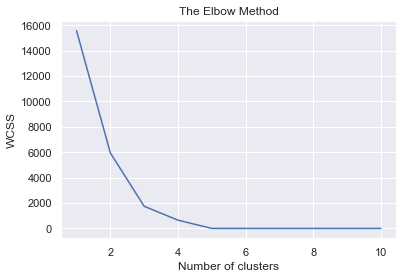

In [8]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [1]:
from sklearn.cluster import KMeans

NameError: name 'y_kmeans' is not defined